In [171]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
from math import factorial as ft 
import plotly.express as px
plt.style.use('ggplot')

In [172]:
df_demo = pd.read_excel('/Users/admin/Desktop/GitHub/new_repos/jackson-heights-analysis/jackson_heights_analysis.xlsx', sheet_name='demographics')
df_rent = pd.read_excel('/Users/admin/Desktop/GitHub/new_repos/jackson-heights-analysis/jackson_heights_analysis.xlsx', sheet_name='rent')
df_value = pd.read_excel('/Users/admin/Desktop/GitHub/new_repos/jackson-heights-analysis/jackson_heights_analysis.xlsx', sheet_name='value')
df_edu_inc = pd.read_excel('/Users/admin/Desktop/GitHub/new_repos/jackson-heights-analysis/jackson_heights_analysis.xlsx', sheet_name='education_income')


In [173]:
display(df_demo.head())
df_demo.info()

,year,occupied_units,available_units,population,minor_children,other_members,foreign_members,professional_head,managerial_head,owner_head,...,public_service_head,clerical_head,blue_collar_head,professional_other,managerial_other,owner_other,sales_other,public_service_other,clerical_other,blue_collar_other
0,1920,88,100,273,25,23,19,0.33,0.18,0.08,...,0.05,0.05,0.11,0.21,0.03,0.1,0.14,0.03,0.18,0.31
1,1930,86,100,230,33,18,24,0.28,0.15,0.09,...,0.08,0.15,0.09,0.16,0.05,0.0,0.08,0.21,0.29,0.21
2,1940,82,100,198,15,18,23,0.26,0.14,0.01,...,0.01,0.13,0.20,0.20,0.05,0.0,0.10,0.08,0.32,0.25
3,1950,100,100,184,7,14,22,0.30,0.09,0.00,...,0.05,0.21,0.23,0.12,0.05,0.0,0.05,0.08,0.58,0.12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  4 non-null      int64  
 1   occupied_units        4 non-null      int64  
 2   available_units       4 non-null      int64  
 3   population            4 non-null      int64  
 4   minor_children        4 non-null      int64  
 5   other_members         4 non-null      int64  
 6   foreign_members       4 non-null      int64  
 7   professional_head     4 non-null      float64
 8   managerial_head       4 non-null      float64
 9   owner_head            4 non-null      float64
 10  sales_head            4 non-null      float64
 11  public_service_head   4 non-null      float64
 12  clerical_head         4 non-null      float64
 13  blue_collar_head      4 non-null      float64
 14  professional_other    4 non-null      float64
 15  managerial_other      4 non

In [174]:
display(df_rent.head())
df_rent.info()

,year,rent_less_30,rent_30_34,rent_35_39,rent_40_44,rent_45_49,rent_50_54,rent_55_59,rent_60_64,rent_65_69,rent_70_84,rent_85_100,rent_80_84,rent_greater_100,rent_unknown
0,1930,NaN,NaN,NaN,7,NaN,NaN,1,1,4,6,2,NaN,1.0,NaN
1,1940,7.0,3.0,1.0,2,14.0,18.0,13,9,11,2,1,NaN,NaN,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              2 non-null      int64  
 1   rent_less_30      1 non-null      float64
 2   rent_30_34        1 non-null      float64
 3   rent_35_39        1 non-null      float64
 4   rent_40_44        2 non-null      int64  
 5   rent_45_49        1 non-null      float64
 6   rent_50_54        1 non-null      float64
 7   rent_55_59        2 non-null      int64  
 8   rent_60_64        2 non-null      int64  
 9   rent_65_69        2 non-null      int64  
 10  rent_70_84        2 non-null      int64  
 11  rent_85_100       2 non-null      int64  
 12  rent_80_84        0 non-null      float64
 13  rent_greater_100  1 non-null      float64
 14  rent_unknown      1 non-null      float64
dtypes: float64(8), int64(7)
memory usage: 372.0 bytes


In [175]:
df_rent = df_rent.fillna(0)
df_rent = df_rent.astype(int)
display(df_rent.head())

,year,rent_less_30,rent_30_34,rent_35_39,rent_40_44,rent_45_49,rent_50_54,rent_55_59,rent_60_64,rent_65_69,rent_70_84,rent_85_100,rent_80_84,rent_greater_100,rent_unknown
0,1930,0,0,0,7,0,0,1,1,4,6,2,0,1,0
1,1940,7,3,1,2,14,18,13,9,11,2,1,0,0,2


In [176]:
display(df_value.head())
df_value.info()

,year,value_2500,value_3000,value_3500,value_3500_2,value_4000,value_4500,value_5000,value_5500,value_6000,value_6500,value_7000,value_7500,value_8000
0,1940,5,5,14,3,6,7,2,7,5,5,5,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   year          1 non-null      int64
 1   value_2500    1 non-null      int64
 2   value_3000    1 non-null      int64
 3   value_3500    1 non-null      int64
 4   value_3500_2  1 non-null      int64
 5   value_4000    1 non-null      int64
 6   value_4500    1 non-null      int64
 7   value_5000    1 non-null      int64
 8   value_5500    1 non-null      int64
 9   value_6000    1 non-null      int64
 10  value_6500    1 non-null      int64
 11  value_7000    1 non-null      int64
 12  value_7500    1 non-null      int64
 13  value_8000    1 non-null      int64
dtypes: int64(14)
memory usage: 244.0 bytes


In [177]:
display(df_edu_inc.head())
df_edu_inc.info()

,who,eight_or_less,some_high_school,completed_high_school,some_college,completed_college,post_graduate,less_1000_income,1000_1999_income,2000_2499_income,2500_2999_income,3000_3499_income,3500_3999_income,4000_4499_income,4500_4999_income,5000_5499_income,unknown_other_income
0,head,14,8,37,7,20,4,2,22,15,9.0,4,1.0,4.0,4.0,5,16
1,other,32,22,46,13,17,1,16,13,4,NaN,1,NaN,NaN,NaN,2,xx


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   who                    2 non-null      object 
 1   eight_or_less          2 non-null      int64  
 2   some_high_school       2 non-null      int64  
 3   completed_high_school  2 non-null      int64  
 4   some_college           2 non-null      int64  
 5   completed_college      2 non-null      int64  
 6   post_graduate          2 non-null      int64  
 7   less_1000_income       2 non-null      int64  
 8   1000_1999_income       2 non-null      int64  
 9   2000_2499_income       2 non-null      int64  
 10  2500_2999_income       1 non-null      float64
 11  3000_3499_income       2 non-null      int64  
 12  3500_3999_income       1 non-null      float64
 13  4000_4499_income       1 non-null      float64
 14  4500_4999_income       1 non-null      float64
 15  5000_5499_

In [178]:
df_edu_inc = df_edu_inc.fillna(0)
df_edu_inc['unknown_other_income'] = df_edu_inc['unknown_other_income'].where((df_edu_inc['unknown_other_income']!= 'xx') , 0)
df_edu_inc['2500_2999_income'] = df_edu_inc['2500_2999_income'].astype(int)
df_edu_inc['3500_3999_income'] = df_edu_inc['3500_3999_income'].astype(int)
df_edu_inc['4000_4499_income'] = df_edu_inc['4000_4499_income'].astype(int)
df_edu_inc['4500_4999_income'] = df_edu_inc['4500_4999_income'].astype(int)
df_edu_inc['unknown_other_income'] = df_edu_inc['unknown_other_income'].astype(int)
display(df_edu_inc.head())
df_edu_inc.info()


,who,eight_or_less,some_high_school,completed_high_school,some_college,completed_college,post_graduate,less_1000_income,1000_1999_income,2000_2499_income,2500_2999_income,3000_3499_income,3500_3999_income,4000_4499_income,4500_4999_income,5000_5499_income,unknown_other_income
0,head,14,8,37,7,20,4,2,22,15,9,4,1,4,4,5,16
1,other,32,22,46,13,17,1,16,13,4,0,1,0,0,0,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   who                    2 non-null      object
 1   eight_or_less          2 non-null      int64 
 2   some_high_school       2 non-null      int64 
 3   completed_high_school  2 non-null      int64 
 4   some_college           2 non-null      int64 
 5   completed_college      2 non-null      int64 
 6   post_graduate          2 non-null      int64 
 7   less_1000_income       2 non-null      int64 
 8   1000_1999_income       2 non-null      int64 
 9   2000_2499_income       2 non-null      int64 
 10  2500_2999_income       2 non-null      int64 
 11  3000_3499_income       2 non-null      int64 
 12  3500_3999_income       2 non-null      int64 
 13  4000_4499_income       2 non-null      int64 
 14  4500_4999_income       2 non-null      int64 
 15  5000_5499_income       2 no

In [179]:
display(df_demo)

,year,occupied_units,available_units,population,minor_children,other_members,foreign_members,professional_head,managerial_head,owner_head,...,public_service_head,clerical_head,blue_collar_head,professional_other,managerial_other,owner_other,sales_other,public_service_other,clerical_other,blue_collar_other
0,1920,88,100,273,25,23,19,0.33,0.18,0.08,...,0.05,0.05,0.11,0.21,0.03,0.1,0.14,0.03,0.18,0.31
1,1930,86,100,230,33,18,24,0.28,0.15,0.09,...,0.08,0.15,0.09,0.16,0.05,0.0,0.08,0.21,0.29,0.21
2,1940,82,100,198,15,18,23,0.26,0.14,0.01,...,0.01,0.13,0.20,0.20,0.05,0.0,0.10,0.08,0.32,0.25
3,1950,100,100,184,7,14,22,0.30,0.09,0.00,...,0.05,0.21,0.23,0.12,0.05,0.0,0.05,0.08,0.58,0.12


In [180]:
df_demo['pop_density'] = df_demo['population'] / df_demo['occupied_units']
df_demo['total_non_heads'] = df_demo['minor_children'] + df_demo['other_members'] + df_demo['foreign_members']
df_demo['minor_percent'] = (df_demo['minor_children'] / df_demo['population']) * 100
df_demo['other_percent'] = (df_demo['other_members'] / df_demo['population']) * 100
df_demo['foreign_percent'] = (df_demo['foreign_members'] / df_demo['population']) * 100
df_demo['non_head_percent'] = (df_demo['total_non_heads'] / df_demo['population']) * 100

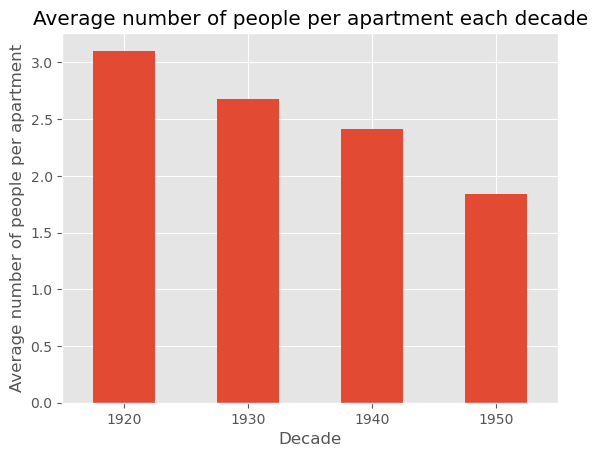

In [181]:
df_demo.plot(kind='bar',
             x='year',
             y='pop_density',
             title='Average number of people per apartment each decade',
             xlabel='Decade',
             ylabel='Average number of people per apartment')
plt.legend().remove()
plt.xticks(rotation=360)
plt.show()

,minor_percent,other_percent,foreign_percent,non_head_percent,year
0,3.804348,7.608696,11.956522,23.369565,1950
1,7.575758,9.090909,11.616162,28.282828,1940
2,14.347826,7.826087,10.434783,32.608696,1930
3,9.157509,8.424908,6.959707,24.542125,1920


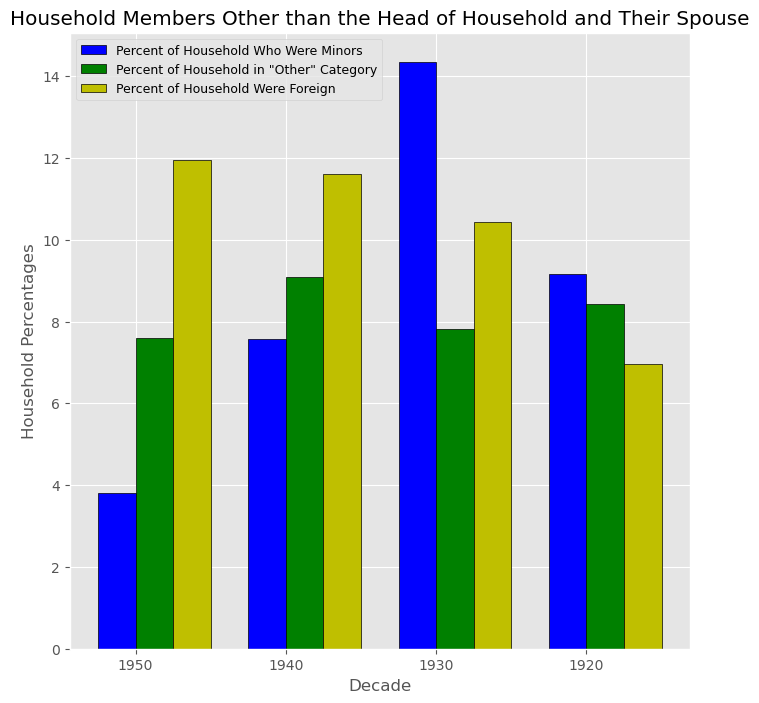

In [206]:
df_demo_percentages = df_demo.groupby(['minor_percent', 'other_percent', 'foreign_percent', 'non_head_percent'])['year'].max().sort_values(ascending=False)
df_demo_percentages = df_demo_percentages.reset_index().rename(columns={0: 'minor_percent', 1: 'other_percent', 2: 'foreign_percent', 3: 'non_head_percent', 'year': 'year'})
#display(df_demo_percentages)
n=4
r = np.arange(n) 
width = 0.25
plt.figure(figsize=(8, 8))
plt.bar(r, df_demo_percentages['minor_percent'], color = 'b', 
        width = width, edgecolor = 'black', 
        label='Percent of Household Who Were Minors')

plt.bar(r + width, df_demo_percentages['other_percent'], color = 'g', 
        width = width, edgecolor = 'black', 
        label='Percent of Household in "Other" Category')

plt.bar(r + width*2, df_demo_percentages['foreign_percent'], color = 'y', 
        width = width, edgecolor = 'black', 
        label='Percent of Household Were Foreign')

'''plt.bar(r + width*3, df_demo_percentages['non_head_percent'], color = 'r', 
        width = width, edgecolor = 'black', 
        label='Total Percent of Household Who Were Not Household Head')'''

plt.xlabel('Decade') 
plt.ylabel('Household Percentages') 
plt.title('Household Members Other than the Head of Household and Their Spouse') 

  
# plt.grid(linestyle='--') 
plt.xticks(r + width/2,['1950', '1940', '1930', '1920']) 
plt.legend(loc='upper left', fontsize=9)
  
plt.show()   

In [183]:
display(df_demo)

,year,occupied_units,available_units,population,minor_children,other_members,foreign_members,professional_head,managerial_head,owner_head,...,sales_other,public_service_other,clerical_other,blue_collar_other,pop_density,total_non_heads,minor_percent,other_percent,foreign_percent,non_head_percent
0,1920,88,100,273,25,23,19,0.33,0.18,0.08,...,0.14,0.03,0.18,0.31,3.102273,67,9.157509,8.424908,6.959707,24.542125
1,1930,86,100,230,33,18,24,0.28,0.15,0.09,...,0.08,0.21,0.29,0.21,2.674419,75,14.347826,7.826087,10.434783,32.608696
2,1940,82,100,198,15,18,23,0.26,0.14,0.01,...,0.10,0.08,0.32,0.25,2.414634,56,7.575758,9.090909,11.616162,28.282828
3,1950,100,100,184,7,14,22,0.30,0.09,0.00,...,0.05,0.08,0.58,0.12,1.840000,43,3.804348,7.608696,11.956522,23.369565


In [184]:
def occupation_sum(column, new_column):
    df_demo[new_column] = round(df_demo[column] * df_demo['population'])
    df_demo[new_column] = df_demo[new_column].astype(int)
    return df_demo[new_column]

In [185]:
occupation_sum('professional_head', 'num_prof_head')
occupation_sum('managerial_head', 'num_manage_head')
occupation_sum('owner_head', 'num_owner_head')
occupation_sum('managerial_other', 'num_manage_other')
occupation_sum('owner_other', 'num_owner_other')
occupation_sum('public_service_other', 'num_pub_serv_other')
occupation_sum('clerical_other', 'num_cler_other')
occupation_sum('blue_collar_other', 'num_blue_other')

0    85
1    48
2    50
3    22
Name: num_blue_other, dtype: int64

In [207]:
display(df_demo)

,year,occupied_units,available_units,population,minor_children,other_members,foreign_members,professional_head,managerial_head,owner_head,...,foreign_percent,non_head_percent,num_prof_head,num_manage_head,num_owner_head,num_manage_other,num_owner_other,num_pub_serv_other,num_cler_other,num_blue_other
0,1920,88,100,273,25,23,19,0.33,0.18,0.08,...,6.959707,24.542125,90,49,22,8,27,8,49,85
1,1930,86,100,230,33,18,24,0.28,0.15,0.09,...,10.434783,32.608696,64,34,21,12,0,48,67,48
2,1940,82,100,198,15,18,23,0.26,0.14,0.01,...,11.616162,28.282828,51,28,2,10,0,16,63,50
3,1950,100,100,184,7,14,22,0.30,0.09,0.00,...,11.956522,23.369565,55,17,0,9,0,15,107,22


,num_prof_head,num_manage_head,num_owner_head,num_manage_other,num_owner_other,num_pub_serv_other,num_cler_other,num_blue_other,year
0,55,17,0,9,0,15,107,22,1950
1,51,28,2,10,0,16,63,50,1940
2,64,34,21,12,0,48,67,48,1930
3,90,49,22,8,27,8,49,85,1920


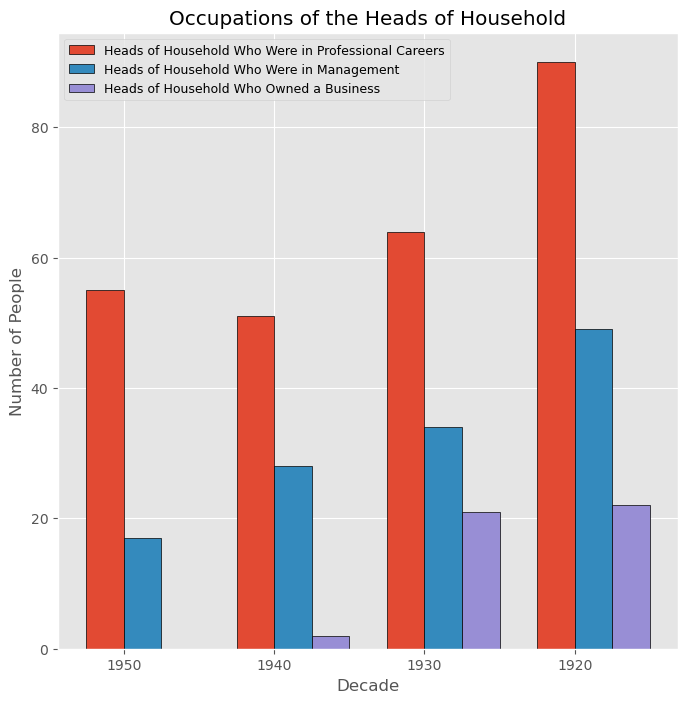

In [215]:
df_demo_numbers = df_demo.groupby(['num_prof_head', 'num_manage_head', 'num_owner_head', 'num_manage_other', 'num_owner_other', 'num_pub_serv_other', 'num_cler_other', 'num_blue_other'])['year'].max().sort_values(ascending=False)
df_demo_numbers = df_demo_numbers.reset_index().rename(columns={0: 'num_prof_head', 1: 'num_manage_head', 2: 'num_owner_head', 3: 'num_manage_other', 4: 'num_owner_other', 5: 'num_pub_serv_other', 6: 'num_cler_other', 7: 'num_cler_other', 8: 'num_blue_other', 'year': 'year'})
display(df_demo_numbers)

n=4
r = np.arange(n) 
width = 0.25
plt.figure(figsize=(8, 8))
plt.bar(r, df_demo_numbers['num_prof_head'],
        width = width, edgecolor = 'black', 
        label='Heads of Household Who Were in Professional Careers')

plt.bar(r + width, df_demo_numbers['num_manage_head'],
        width = width, edgecolor = 'black', 
        label='Heads of Household Who Were in Management')

plt.bar(r + width*2, df_demo_numbers['num_owner_head'],
        width = width, edgecolor = 'black', 
        label='Heads of Household Who Owned a Business')

'''plt.bar(r + width*3, df_demo_percentages['non_head_percent'], color = 'r', 
        width = width, edgecolor = 'black', 
        label='Total Percent of Household Who Were Not Household Head')'''

plt.xlabel('Decade') 
plt.ylabel('Number of People') 
plt.title('Occupations of the Heads of Household') 

  
# plt.grid(linestyle='--') 
plt.xticks(r + width/2,['1950', '1940', '1930', '1920']) 
plt.legend(loc='upper left', fontsize=9)
  
plt.show()  

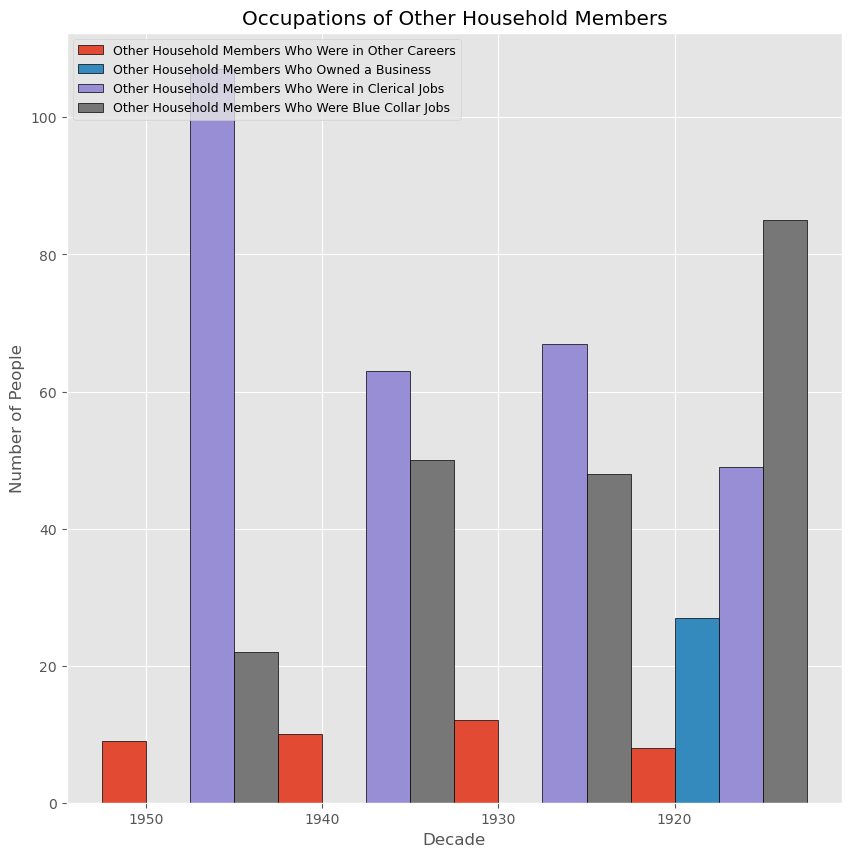

In [216]:
n=4
r = np.arange(n) 
width = 0.25
plt.figure(figsize=(10, 10))
plt.bar(r, df_demo_numbers['num_manage_other'],
        width = width, edgecolor = 'black', 
        label='Other Household Members Who Were in Other Careers')

plt.bar(r + width, df_demo_numbers['num_owner_other'],
        width = width, edgecolor = 'black', 
        label='Other Household Members Who Owned a Business')

plt.bar(r + width*2, df_demo_numbers['num_cler_other'],
        width = width, edgecolor = 'black', 
        label='Other Household Members Who Were in Clerical Jobs')

plt.bar(r + width*3, df_demo_numbers['num_blue_other'], 
        width = width, edgecolor = 'black', 
        label='Other Household Members Who Were Blue Collar Jobs')

plt.xlabel('Decade') 
plt.ylabel('Number of People') 
plt.title('Occupations of Other Household Members') 

  
# plt.grid(linestyle='--') 
plt.xticks(r + width/2,['1950', '1940', '1930', '1920']) 
plt.legend(loc='upper left', fontsize=9)
  
plt.show()  

In [214]:
display(df_rent.head())


,year,rent_less_30,rent_30_34,rent_35_39,rent_40_44,rent_45_49,rent_50_54,rent_55_59,rent_60_64,rent_65_69,rent_70_84,rent_85_100,rent_80_84,rent_greater_100,rent_unknown
0,1930,0,0,0,7,0,0,1,1,4,6,2,0,1,0
1,1940,7,3,1,2,14,18,13,9,11,2,1,0,0,2


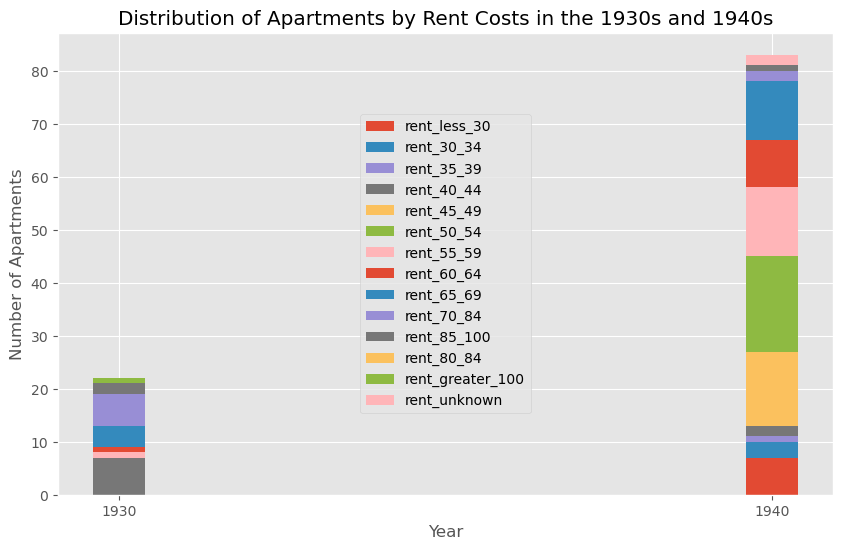

In [268]:
df_rent_year = df_rent.groupby('year').sum().reset_index()

columns_for_y = ['rent_less_30', 'rent_30_34', 'rent_35_39', 'rent_40_44', 'rent_45_49', 'rent_50_54', 'rent_55_59', 'rent_60_64', 'rent_65_69', 'rent_70_84', 'rent_85_100', 'rent_80_84', 'rent_greater_100', 'rent_unknown']

years_to_include = [1930, 1940]
df_rent_year_filtered = df_rent_year[df_rent_year['year'].isin(years_to_include)]

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(df_rent_year_filtered['year'], df_rent_year_filtered[columns_for_y[0]], label=columns_for_y[0])
for i in range(1, len(columns_for_y)):
    ax.bar(df_rent_year_filtered['year'], df_rent_year_filtered[columns_for_y[i]], bottom=df_rent_year_filtered[columns_for_y[:i]].sum(axis=1), label=columns_for_y[i])

ax.set_title('Distribution of Apartments by Rent Costs in the 1930s and 1940s')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Apartments')
ax.set_xticks(years_to_include)
ax.legend(loc='center')
plt.show()


In [271]:
display(df_value.head())
#df_value.info()

,year,value_2500,value_3000,value_3500,value_3500_2,value_4000,value_4500,value_5000,value_5500,value_6000,value_6500,value_7000,value_7500,value_8000
0,1940,5,5,14,3,6,7,2,7,5,5,5,2,2


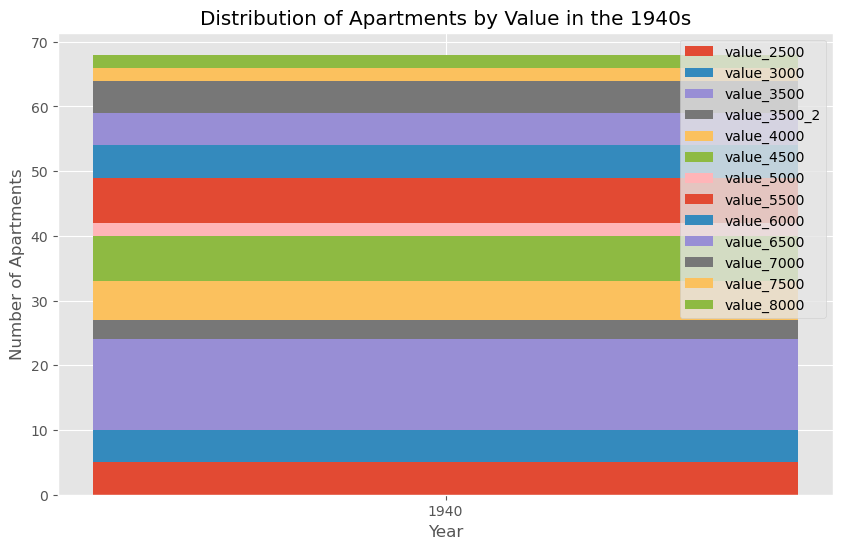

In [280]:
df_value_year = df_value.groupby('year').sum().reset_index()

# Extracting column names for y-axis
columns_for_y = ['value_2500', 'value_3000', 'value_3500', 'value_3500_2', 'value_4000', 'value_4500', 'value_5000', 'value_5500', 'value_6000', 'value_6500', 'value_7000', 'value_7500', 'value_8000']

# Plotting
value_years_to_include = [1940]
df_value_year_filtered = df_value_year[df_value_year['year'].isin(value_years_to_include)]

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(df_value_year['year'], df_value_year_filtered[columns_for_y[0]], label=columns_for_y[0])
for i in range(1, len(columns_for_y)):
    ax.bar(df_value_year_filtered['year'], df_value_year_filtered[columns_for_y[i]], bottom=df_value_year_filtered[columns_for_y[:i]].sum(axis=1), label=columns_for_y[i])

ax.set_title('Distribution of Apartments by Value in the 1940s')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Apartments')
ax.set_xticks(value_years_to_include)
ax.legend(loc='upper right')
plt.show()



In [281]:
display(df_edu_inc)

,who,eight_or_less,some_high_school,completed_high_school,some_college,completed_college,post_graduate,less_1000_income,1000_1999_income,2000_2499_income,2500_2999_income,3000_3499_income,3500_3999_income,4000_4499_income,4500_4999_income,5000_5499_income,unknown_other_income
0,head,14,8,37,7,20,4,2,22,15,9,4,1,4,4,5,16
1,other,32,22,46,13,17,1,16,13,4,0,1,0,0,0,2,0
